<a href="https://colab.research.google.com/github/gdpepp/python-course/blob/master/Smoking_model_%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carga de Datos

In [21]:
from google.colab import files
import pandas as pd

# Subís los dos archivos manualmente
uploaded = files.upload()

# Luego los cargas con el nombre exacto que aparece
df = pd.read_excel("smoking prediction.xlsx")              # Este es el que contiene la columna 'smoking'
df_entrega = pd.read_excel("smoking prediction entrega.xlsx")  # Este es el de entrega, sin etiquetas



Saving smoking prediction.xlsx to smoking prediction (2).xlsx


EDA (Exploración de Datos) y Limpieza

In [22]:

# Mostramos información general: filas, columnas, tipos de datos
df.info()

# Verificamos valores faltantes (NaNs)
print("\nValores faltantes por columna:")
print(df.isnull().sum().sort_values(ascending=False))

# Mostramos estadísticas generales de todas las columnas numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,26284.994580,44.189300,164.652000,65.878700,3.414852,0.028446,0.028304,0.042736,0.042758,5.062531,...,2.387543,4.790698,0.593785,0.045290,0.018821,1.093193,1.129345,1.668142,0.213120,0.366580
std,16015.070567,12.090086,9.208778,12.831355,0.386765,0.024007,0.024216,0.006588,0.006655,0.570100,...,0.615559,1.709238,0.065870,0.016872,0.018432,0.827986,1.327431,2.110347,0.409516,0.481875
min,0.000000,20.000000,130.000000,30.000000,2.125000,0.000694,0.000694,0.041667,0.041667,2.958333,...,0.166667,0.041667,0.172917,0.041667,0.000694,0.250000,0.041667,0.041667,0.000000,0.000000
25%,12499.750000,40.000000,160.000000,55.000000,3.166667,0.005556,0.005556,0.041667,0.041667,4.666667,...,1.958333,3.833333,0.545833,0.041667,0.005556,0.791667,0.625000,0.708333,0.000000,0.000000
50%,24999.500000,40.000000,165.000000,65.000000,3.416667,0.041667,0.041667,0.041667,0.041667,5.000000,...,2.291667,4.708333,0.588889,0.041667,0.006250,0.958333,0.875000,1.041667,0.000000,0.000000
75%,40034.250000,55.000000,170.000000,75.000000,3.666667,0.043056,0.043056,0.041667,0.041667,5.416667,...,2.750000,5.666667,0.630556,0.041667,0.041667,1.208333,1.291667,1.833333,0.000000,1.000000
max,55690.000000,85.000000,190.000000,135.000000,5.375000,0.381250,0.381250,0.083333,0.083333,10.000000,...,25.750000,77.500000,0.875694,0.250000,0.462500,54.625000,121.416667,41.625000,1.000000,1.000000


Limpieza de columnas categóricas

In [23]:
# Revisamos los valores únicos antes de mapear
print("Gender:", df['gender'].unique())
print("Oral:", df['oral'].unique())
print("Tartar:", df['tartar'].unique())

# Limpiamos texto y convertimos a binario
df['gender'] = df['gender'].astype(str).str.strip().str.upper().map({'M': 0, 'F': 1})
df['oral'] = df['oral'].astype(str).str.strip().str.upper().map({'Y': 1, 'N': 0})
df['tartar'] = df['tartar'].astype(str).str.strip().str.upper().map({'Y': 1, 'N': 0})


Gender: ['F' 'M']
Oral: ['Y']
Tartar: ['Y' 'N']


Eliminamos columnas si están rotas o vacías

In [43]:
# Mostramos información general del dataset: filas, columnas, tipos de datos
df.info()

# Verificamos si hay valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum().sort_values(ascending=False))

# Mostramos estadísticas básicas para variables numéricas
print("\nResumen estadístico de columnas numéricas:")
print(df.describe())

# Limpiamos y estandarizamos valores categóricos en texto
df['gender'] = df['gender'].astype(str).str.strip().str.upper()
df['oral'] = df['oral'].astype(str).str.strip().str.upper()
df['tartar'] = df['tartar'].astype(str).str.strip().str.upper()

# Aplicamos mapeo binario donde corresponde
df['tartar'] = df['tartar'].map({'Y': 1, 'N': 0})

# Eliminamos columnas que no aportan valor (según análisis previo)
df = df.drop(columns=['gender', 'oral'], errors='ignore')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  int64  
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

Eliminamos columnas si están rotas o vacías

In [26]:
# Si hay NaNs después del mapeo, mejor eliminarlas para no ensuciar el modelo
df = df.drop(columns=['oral', 'tartar'], errors='ignore')


 Visualización Exploratoria (EDA)

Histograma Edades

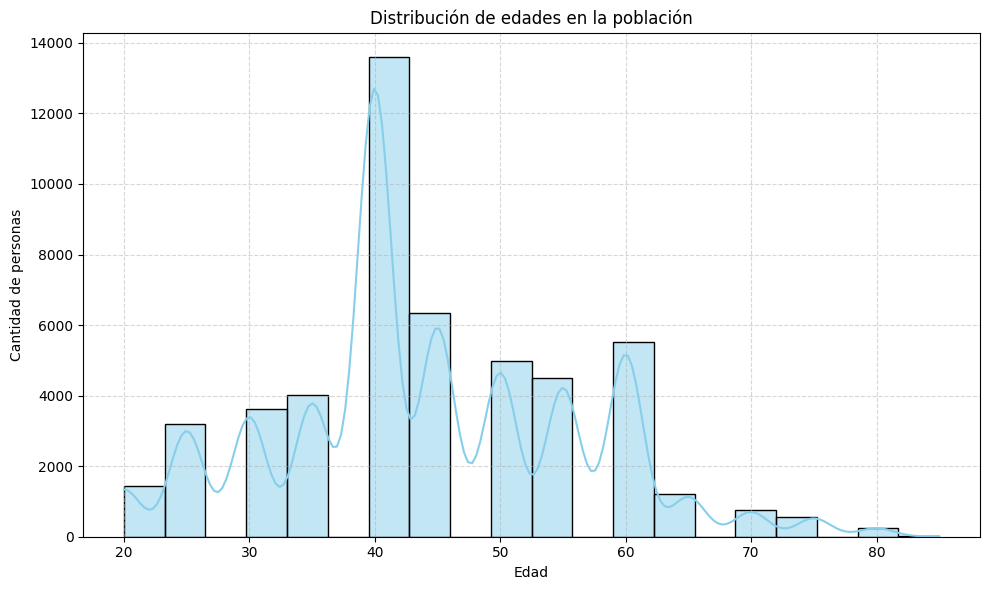

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Distribución de edades en la población")
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Boxplot colesterol por genero

In [29]:
df = pd.read_excel("smoking prediction.xlsx")  # NO el de entrega


In [30]:
print(df.columns)


Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')


In [31]:
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df['gender_label'] = df['gender'].map({0: 'M', 1: 'F'})


In [32]:
print("Valores únicos en gender:", df['gender'].unique())
print("Valores únicos en gender_label:", df['gender_label'].unique())


Valores únicos en gender: [1 0]
Valores únicos en gender_label: ['F' 'M']


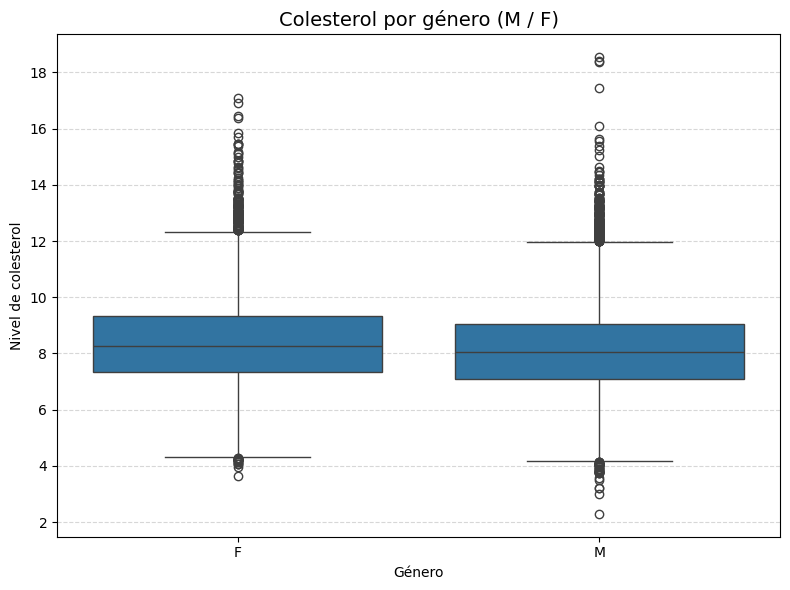

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender_label', y='Cholesterol')  # sin 'palette' ni 'hue'
plt.title("Colesterol por género (M / F)", fontsize=14)
plt.xlabel("Género")
plt.ylabel("Nivel de colesterol")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<Axes: xlabel='Smoking', ylabel='Cholesterol'>

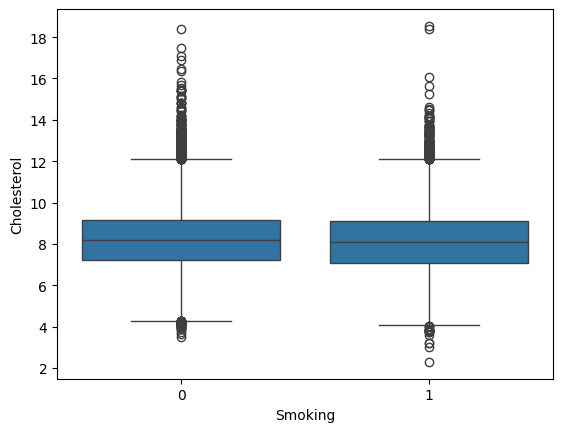

In [41]:
sns.boxplot(data=df, x='Smoking', y='Cholesterol')


In [35]:
print(df.columns)


Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking', 'gender_label'],
      dtype='object')


In [36]:
df.rename(columns={'smoking': 'Smoking'}, inplace=True)


Colesterol vs Smoking

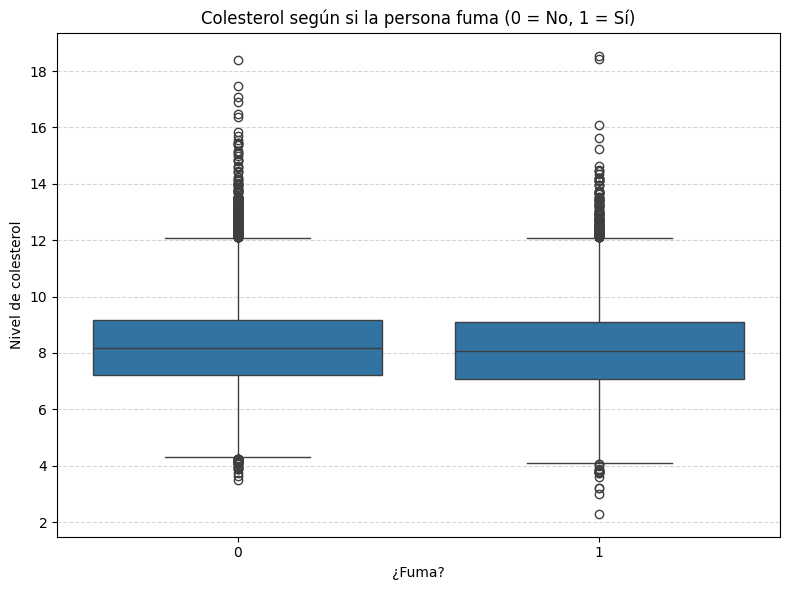

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smoking', y='Cholesterol')
plt.title("Colesterol según si la persona fuma (0 = No, 1 = Sí)")
plt.xlabel("¿Fuma?")
plt.ylabel("Nivel de colesterol")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Presión sistólica vs Smoking

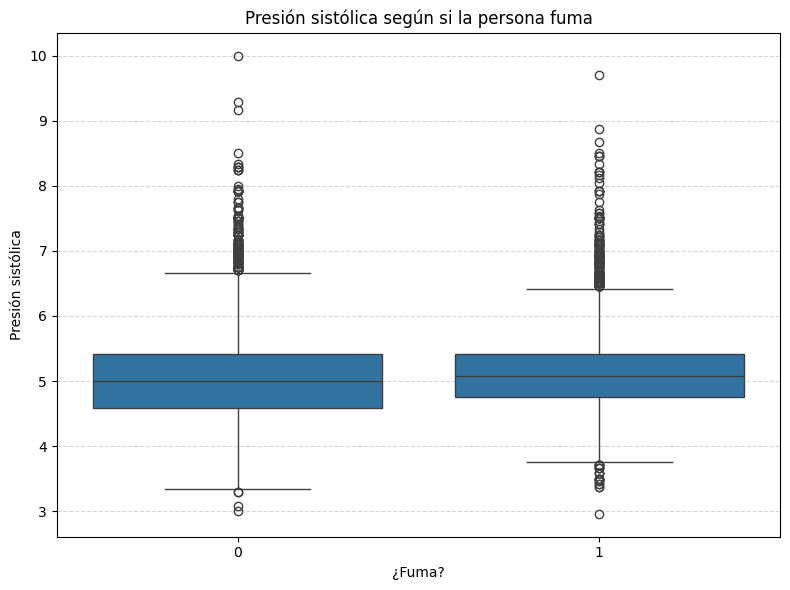

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smoking', y='systolic')
plt.title("Presión sistólica según si la persona fuma")
plt.xlabel("¿Fuma?")
plt.ylabel("Presión sistólica")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Triglicéridos vs Smoking

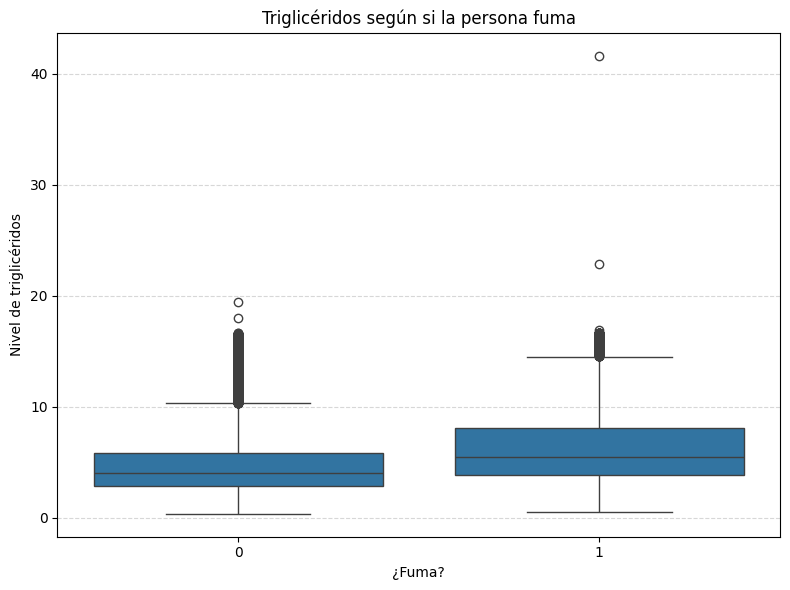

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smoking', y='triglyceride')
plt.title("Triglicéridos según si la persona fuma")
plt.xlabel("¿Fuma?")
plt.ylabel("Nivel de triglicéridos")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


GTP vs Smoking

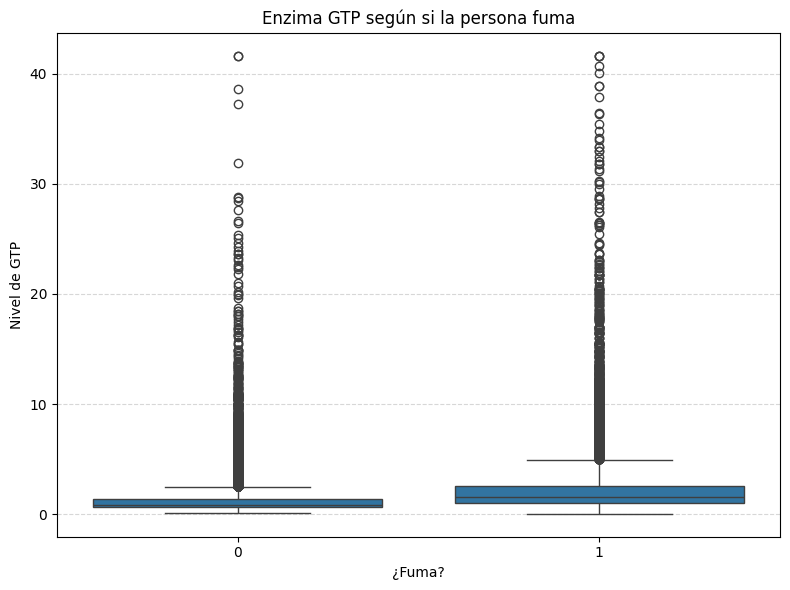

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smoking', y='Gtp')
plt.title("Enzima GTP según si la persona fuma")
plt.xlabel("¿Fuma?")
plt.ylabel("Nivel de GTP")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


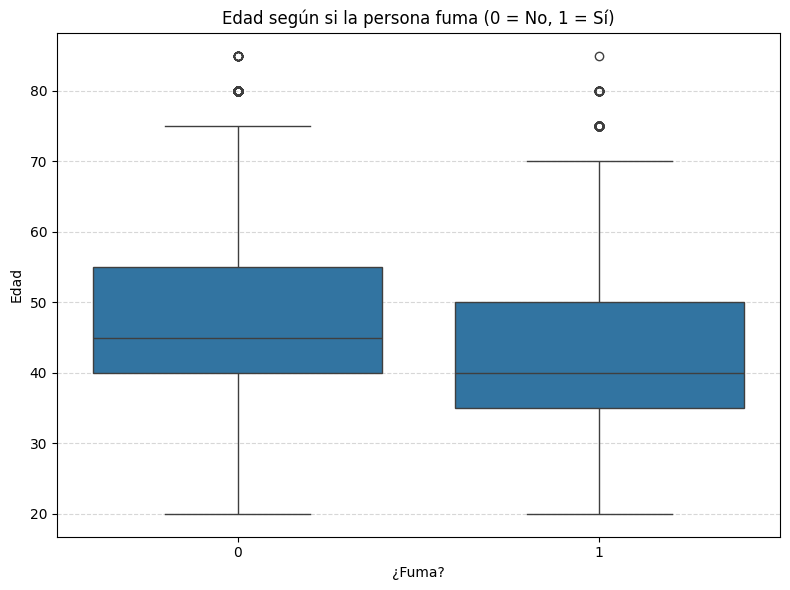

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smoking', y='age')
plt.title("Edad según si la persona fuma (0 = No, 1 = Sí)")
plt.xlabel("¿Fuma?")
plt.ylabel("Edad")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Boxplot: Colesterol por género
Los niveles de colesterol son similares entre hombres y mujeres. Aunque hay valores extremos en ambos grupos, el género no parece ser un factor determinante para predecir si una persona fuma. Esta variable no aporta demasiada separación por sí sola.

Boxplot: Colesterol según si fuman
Los fumadores muestran una leve tendencia a tener el colesterol más alto y más dispersión en los valores. Esto indica que el colesterol podría tener una relación con el hábito de fumar y puede aportar información útil al modelo.

Boxplot: Triglicéridos y si la persona fuma
Se observa mayor variabilidad en los triglicéridos de los fumadores, con casos más extremos que entre los no fumadores. Esto sugiere que los triglicéridos también están asociados al tabaquismo y podrían ser una variable relevante en la predicción.

Conclusión general
Los boxplots permitieron identificar variables que presentan diferencias entre fumadores y no fumadores. Esta exploración ayuda a definir cuáles pueden ser útiles para el modelo. Sin este análisis, se perdería la oportunidad de entender mejor la información y tomar decisiones fundamentadas para la selección de variables.

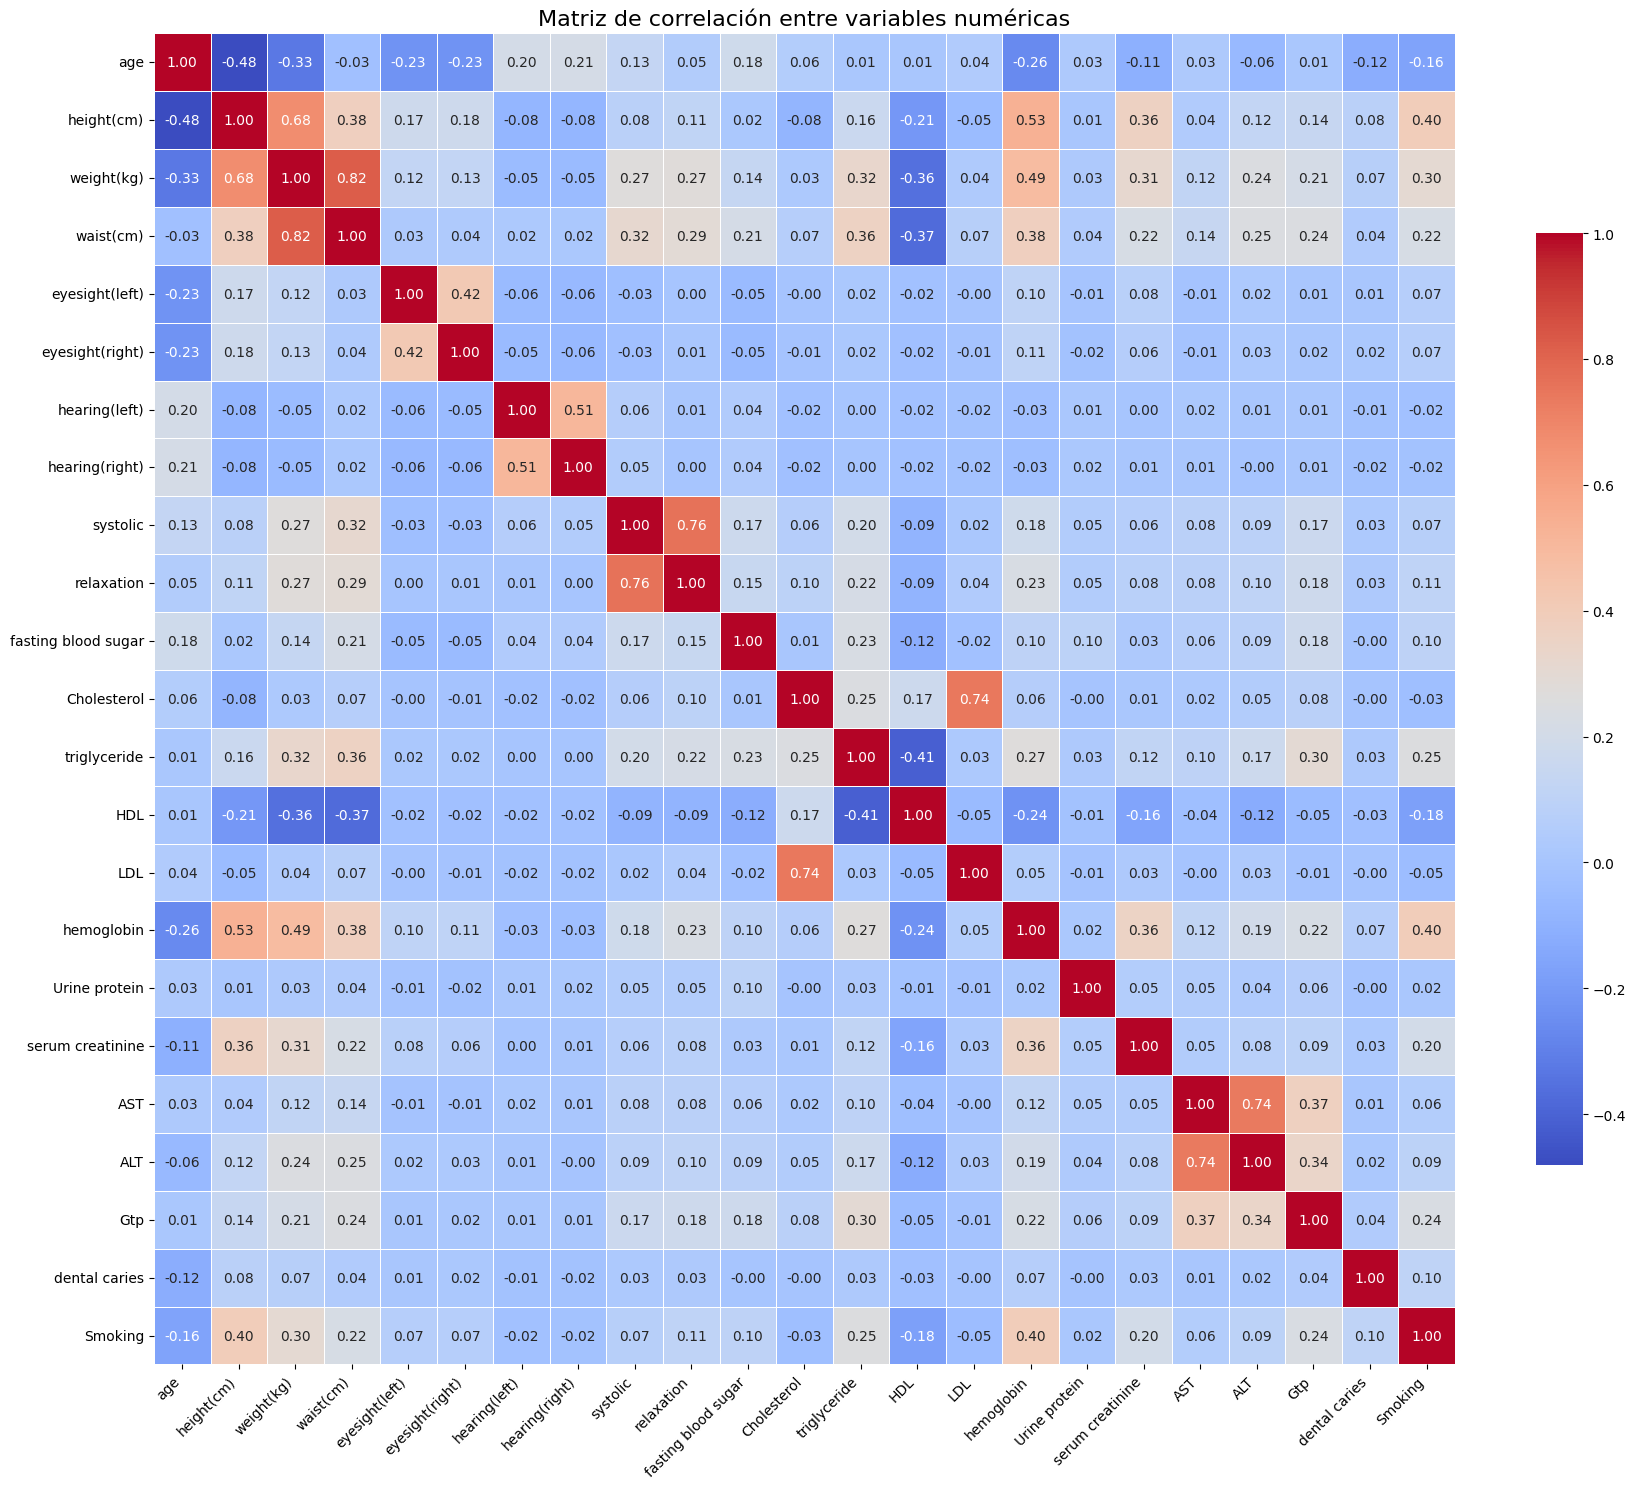

In [71]:
# Solo eliminamos si existen en el DataFrame
columnas_a_dropear = [col for col in ['ID', 'gender_label'] if col in df.columns]

# Preparamos el DataFrame para calcular correlación
df_corr = df.drop(columns=columnas_a_dropear)

# Calculamos matriz de correlación
correlation_matrix = df_corr.corr()

# Graficamos
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.7})
plt.title("Matriz de correlación entre variables numéricas", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [52]:
X = df.drop(columns=['Smoking', 'gender_label'])  # Solo eliminamos lo que existe
y = df['Smoking']


In [56]:
print(df.columns)



Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'Smoking', 'gender_label'],
      dtype='object')


In [57]:
# Eliminamos columnas que no son útiles para el modelo
X = df.drop(columns=['Smoking', 'gender_label'])  # Nos quedamos solo con las variables numéricas
y = df['Smoking']  # Variable objetivo: si fuma o no


In [58]:
print("¿Hay NaNs en X?", X.isnull().sum().sum())
print("¿Hay NaNs en y?", y.isnull().sum())
print("Tipos de datos en X:\n", X.dtypes.value_counts())


¿Hay NaNs en X? 0
¿Hay NaNs en y? 0
Tipos de datos en X:
 float64    18
int64       4
Name: count, dtype: int64


Entrenamiento del modelo

Accuracy: 0.7786666666666666

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      9464
           1       0.71      0.68      0.70      5536

    accuracy                           0.78     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000



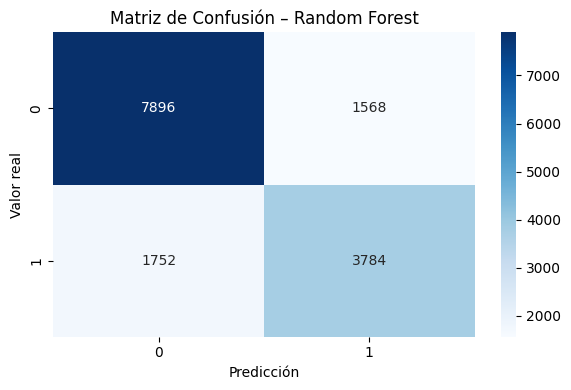

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Dividimos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecimos
y_pred = rf.predict(X_test)

# Evaluamos
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión – Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()


In [60]:
df_entrega = pd.read_excel("smoking prediction entrega.xlsx")


In [61]:
# Convertimos a mayúsculas y mapeamos como antes
df_entrega['gender'] = df_entrega['gender'].astype(str).str.strip().str.upper().map({'M': 0, 'F': 1})
df_entrega['oral'] = df_entrega['oral'].astype(str).str.strip().str.upper().map({'Y': 1, 'N': 0})
df_entrega['tartar'] = df_entrega['tartar'].astype(str).str.strip().str.upper().map({'Y': 1, 'N': 0})

# Creamos 'gender_label' como antes (si fue usada en alguna visualización)
df_entrega['gender_label'] = df_entrega['gender'].map({0: 'M', 1: 'F'})

# Eliminamos columnas no predictivas (oral, tartar, gender_label)
df_entrega = df_entrega.drop(columns=['oral', 'tartar', 'gender_label'], errors='ignore')


In [62]:
# Revisamos las columnas disponibles
print(df_entrega.columns)

# Definimos X_entrega
X_entrega = df_entrega.drop(columns=['ID'], errors='ignore')  # ID no se usa para predecir


Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries'],
      dtype='object')


In [64]:
# Primero revisamos qué columnas usó el modelo en el entrenamiento
print("Columnas de entrenamiento:", X.columns.tolist())
print("Columnas actuales de X_entrega:", X_entrega.columns.tolist())

# Forzamos que X_entrega tenga las mismas columnas que X (las del entrenamiento)
X_entrega = df_entrega[X.columns]


Columnas de entrenamiento: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']
Columnas actuales de X_entrega: ['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']


In [65]:
# Ahora sí, hacemos la predicción sin error
df_entrega['Smoking'] = rf.predict(X_entrega)


In [66]:
df_entrega['Smoking'] = rf.predict(X_entrega)


In [67]:
df_entrega.to_excel("predicciones_entrega_final.xlsx", index=False)


In [68]:
df_entrega[['ID', 'Smoking']].head()


,ID,Smoking
0,27358,1
1,27364,1
2,27368,1
3,27378,0
4,27381,1


In [72]:
df_entrega.to_excel("predicciones_entrega_final.xlsx", index=False)
